In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
# if output folder does not exist, create it
directory = './output'
if not os.path.exists(directory):
    os.makedirs(directory)

In [3]:
data_dir = "./data" # path to data directory
month_dfs = {} # dictionary to store dataframe for each month

for month_dir in os.listdir(data_dir): # find all folders for each month
    month_dir_path = os.path.join(data_dir, month_dir) # get path to each month folder
    month_name = "".join([x for x in month_dir if not x.isdigit()]) # extract only the name of the month

    data_files = os.listdir(month_dir_path) # find all data files for a month
    data_files = sorted(data_files, key=lambda x: int(x[7:])) # sort data_files according to day
    
    for i, day_file in enumerate(data_files): 
        day_file_path = os.path.join(month_dir_path, day_file) # get path to each data file containing data for each day
        day = "".join([x for x in day_file if x.isdigit()]) # get the day number
        
        df = pd.read_csv(day_file_path, sep="  ", header=None,
                         names=['height', f'temperature_{day}']) # read the files, the files contain no header,
                                                                # thus the columns are given names manually, 
                                                                # It was found that there were two spaces between data of
                                                                # two columns thus sep was set to "  ".

        if i == 0:
            month_df = df
        else:
            month_df = pd.merge(month_df, df, on='height') # join the dataframes on basis of height

    # extract column names for temperatures
    month_df_columns = month_df.columns
    temperature_columns = [x for x in month_df_columns if 'temperature' in x]
    
    # get average temperature at a given height for the month
    month_df['avg_temperature'] = month_df[temperature_columns].mean(axis=1)
    
    month_dfs[month_name] = month_df # add the dataframe to the dictionary
        

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [4]:
month_dfs["apr"] # sample element of the dictionary

,height,temperature_1,temperature_2,temperature_3,temperature_4,temperature_5,temperature_6,temperature_7,temperature_8,temperature_9,...,temperature_22,temperature_23,temperature_24,temperature_25,temperature_26,temperature_27,temperature_28,temperature_29,temperature_30,avg_temperature
0,0.0,293.8,293.8,293.8,293.9,293.9,294.0,294.0,294.1,294.1,...,294.7,294.8,294.8,294.9,294.9,295.0,295.0,295.1,295.1,294.423333
1,0.5,291.3,291.4,291.4,291.4,291.5,291.5,291.6,291.6,291.7,...,292.3,292.3,292.4,292.4,292.5,292.5,292.6,292.6,292.7,291.970000
2,1.0,288.8,288.8,288.8,288.9,288.9,289.0,289.0,289.0,289.1,...,289.7,289.7,289.8,289.8,289.9,289.9,290.0,290.0,290.1,289.390000
3,1.5,286.1,286.1,286.1,286.2,286.2,286.3,286.3,286.4,286.4,...,287.0,287.1,287.1,287.2,287.2,287.3,287.3,287.4,287.4,286.716667
4,2.0,283.3,283.3,283.4,283.4,283.4,283.5,283.5,283.6,283.6,...,284.3,284.3,284.4,284.4,284.5,284.5,284.6,284.6,284.7,283.956667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,118.0,351.1,350.2,349.4,348.8,349.8,348.4,354.6,349.9,349.3,...,351.6,355.3,353.6,356.7,355.3,353.0,350.3,351.9,352.4,352.500000
237,118.5,356.9,355.8,354.8,354.1,355.2,353.5,360.6,355.1,354.4,...,356.6,360.8,358.9,362.4,360.7,358.0,355.0,356.7,357.3,357.903333
238,119.0,362.5,361.3,360.1,359.3,360.5,358.6,366.6,360.3,359.5,...,361.6,366.3,364.1,368.1,366.2,363.0,359.5,361.5,362.1,363.253333
239,119.5,368.2,366.7,365.4,364.4,365.7,363.6,372.6,365.5,364.5,...,366.5,371.8,369.3,373.7,371.5,368.0,364.1,366.3,366.9,368.566667


In [5]:
# sort the dictionary according to months
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sorted_dfs = {}
for key in months:
    sorted_dfs[key] = month_dfs[key]

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

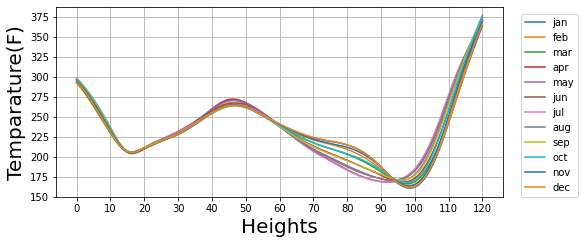

In [7]:
fig,ax = plt.subplots(1, figsize=(8,3.5))

for month, df in sorted_dfs.items():
    heights = df["height"].values
    avg_temp = df["avg_temperature"].values
    ax.plot(heights, avg_temp, label=month)
    
ax.set_xlabel("Heights", fontsize=20)
ax.set_ylabel("Temparature(F)", fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.grid()
plt.legend(loc=(1.04,0))
plt.savefig('./output/month_wise_line_plot.pdf')
plt.show()

## Hardcoded Layers Range

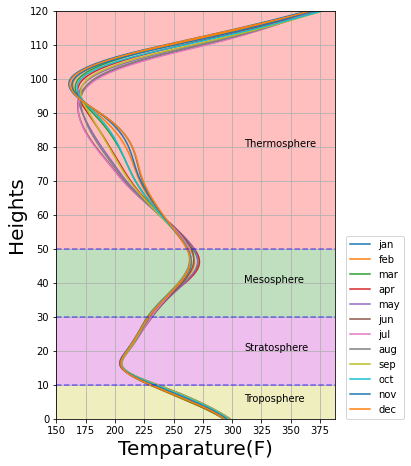

In [233]:
fig,ax = plt.subplots(1, figsize=(5,7.5))

for month, df in sorted_dfs.items():
    heights = df["height"].values
    avg_temp = df["avg_temperature"].values
    ax.plot(avg_temp, heights, label=month)

plt.axhspan(0, 10, facecolor='y', alpha=0.25)
plt.axhspan(10, 30, facecolor='m', alpha=0.25)
plt.axhspan(30, 50, facecolor='g', alpha=0.25)
plt.axhspan(50, 120, facecolor='r', alpha=0.25)

plt.axhline(y=10, color='b', linestyle='--', alpha=0.5)
plt.axhline(y=30, color='b', linestyle='--', alpha=0.5)
plt.axhline(y=50, color='b', linestyle='--', alpha=0.5)

plt.text(310, 5, 'Troposphere')
plt.text(310, 20, 'Stratosphere')
plt.text(310, 40, 'Mesosphere')
plt.text(310, 80, 'Thermosphere')

ax.set_ylim(0,120)
    
ax.set_xlabel("Temparature(F)", fontsize=20)
ax.set_ylabel("Heights", fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.grid()
plt.legend(loc=(1.04,0))
plt.savefig('./output/month_wise_line_plot_vertical.pdf')
plt.show()

## Layers' Range using Calculated Turning Points

In [234]:
topo_height = 16.239071
strato_height = 46.284153
meso_height = 95.789617

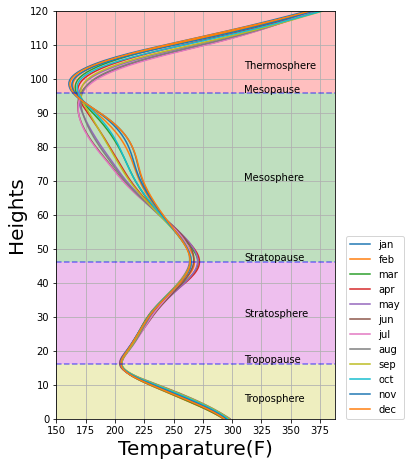

In [244]:
fig,ax = plt.subplots(1, figsize=(5,7.5))

for month, df in sorted_dfs.items():
    heights = df["height"].values
    avg_temp = df["avg_temperature"].values
    ax.plot(avg_temp, heights, label=month)

plt.axhspan(0, topo_height, facecolor='y', alpha=0.25)
plt.axhspan(topo_height, strato_height, facecolor='m', alpha=0.25)
plt.axhspan(strato_height, meso_height, facecolor='g', alpha=0.25)
plt.axhspan(meso_height, 120, facecolor='r', alpha=0.25)

plt.axhline(y=topo_height, color='b', linestyle='--', alpha=0.5)
plt.axhline(y=strato_height, color='b', linestyle='--', alpha=0.5)
plt.axhline(y=meso_height, color='b', linestyle='--', alpha=0.5)

plt.text(310, 5, 'Troposphere')
plt.text(310, 30, 'Stratosphere')
plt.text(310, 70, 'Mesosphere')
plt.text(310, 103, 'Thermosphere')

plt.text(310, topo_height + 0.1, 'Tropopause')
plt.text(310, strato_height + 0.1, 'Stratopause')
plt.text(310, meso_height + 0.1, 'Mesopause')

ax.set_ylim(0,120)
    
ax.set_xlabel("Temparature(F)", fontsize=20)
ax.set_ylabel("Heights", fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.grid()
plt.legend(loc=(1.04,0))
plt.savefig('./output/month_wise_line_plot_vertical.pdf')
plt.show()

## Estimation of Turning Points

In [8]:
from scipy.signal import argrelextrema

In [112]:
def filter_consecutive(data, stepsize=1):
    consec = np.split(data, np.where(np.diff(data) != stepsize)[0]+1)
    return [x[0] for x in consec]

In [174]:
def filter_extremas(x, max_index):
    x = np.array(filter_consecutive(x))
    x = np.array(filter_consecutive(x, stepsize=2))
    if x[0] == 0:
        x = x[1:]
    if x[-1] == max_index:
        x = x[:-1]
    return x

In [189]:
def extract_maxima(x, y):
    indices = argrelextrema(x, np.greater_equal)[0]
    indices = filter_extremas(indices, 240)
    final_indices = []
    for i in indices:
        if 20 < y[i] < 50:
            final_indices.append(i)
    return {
        'stratos_temp': x[final_indices],
        'stratos_height': y[final_indices]
    }
def extract_minima(x, y):
    indices = argrelextrema(x, np.less_equal)[0]
    indices = filter_extremas(indices, 240)
    t_indices = []
    s_indices = []
    for i in indices:
        if 0 < y[i] <= 20:
            t_indices.append(i)
        if 55 <= y[i] <=120:
            s_indices.append(i)
    return {
        'tropos_temp': x[t_indices],
        'tropos_height': y[t_indices],
        'mesos_temp': x[s_indices],
        'mesos_height': y[s_indices]
    }

In [190]:
rows = []
day = 0
for month, df in sorted_dfs.items():
    df = df.drop(['avg_temperature'], 1)
    all_cols = df.columns
    temp_cols = [x for x in all_cols if "temperature" in x]
    for temp_col in temp_cols:
        day += 1
        heights = df['height'].values
        temperatures = df[temp_col].values
        minimas = extract_minima(temperatures, heights)
        maximas = extract_maxima(temperatures, heights)

        # if minimas[0].shape[0] > 2 or maximas[0].shape[0] > 1:
        #     print(minimas, maximas)
        #     plt.plot(temperatures, label=str(day))
        #     plt.legend()

        rows.append({
            'Day': day,
            'Tropopause_temp': minimas['tropos_temp'].item(),
            'Stratopause_temp': maximas['stratos_temp'].item(),
            'Mesopause_temp': minimas['mesos_temp'].item(),
            'Tropopause_height': minimas['tropos_height'].item(),
            'Stratopause_height': maximas['stratos_height'].item(),
            'Mesopause_height': minimas['mesos_height'].item(),
            
        })

In [191]:
final_df = pd.DataFrame(rows)
final_df.describe()

,Day,Tropopause_temp,Stratopause_temp,Mesopause_temp,Tropopause_height,Stratopause_height,Mesopause_height
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,183.500000,205.212842,266.675410,166.454645,16.239071,46.284153,95.789617
std,105.799338,0.607645,2.883158,3.678411,0.250103,0.369924,2.676790
min,1.000000,204.000000,263.700000,158.000000,16.000000,46.000000,89.000000
25%,92.250000,204.900000,264.400000,163.500000,16.000000,46.000000,93.625000
50%,183.500000,205.300000,265.000000,167.700000,16.000000,46.000000,97.000000
75%,274.750000,205.800000,269.100000,169.175000,16.500000,46.500000,98.000000
max,366.000000,206.000000,272.200000,174.100000,16.500000,47.000000,98.500000


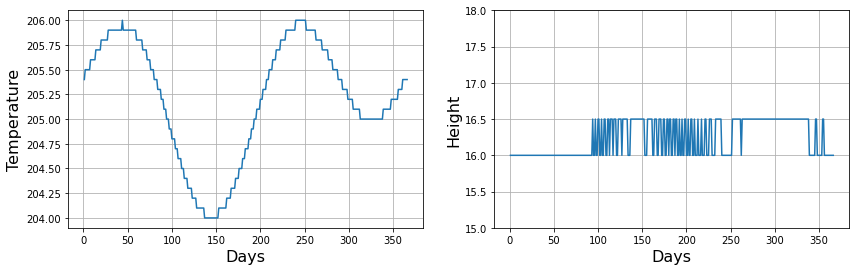

In [213]:
fig,ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(final_df['Day'].values, final_df['Tropopause_temp'].values, label='Tropopause')
# ax[0].plot(final_df['Day'].values, final_df['Stratopause_temp'].values, label='Stratopause')
# ax[0].plot(final_df['Day'].values, final_df['Mesopause_temp'].values, label='Mesopause')
ax[0].set_xlabel('Days', fontsize = 16)
ax[0].set_ylabel('Temperature', fontsize = 16)
ax[0].grid()

ax[1].plot(final_df['Day'].values, final_df['Tropopause_height'].values, label='Tropopause')
# ax[1].plot(final_df['Day'].values, final_df['Stratopause_height'].values, label='Stratopause')
# ax[1].plot(final_df['Day'].values, final_df['Mesopause_height'].values, label='Mesopause')
ax[1].set_ylim(15, 18)
ax[1].set_xlabel('Days', fontsize = 16)
ax[1].set_ylabel('Height', fontsize = 16)
ax[1].grid()




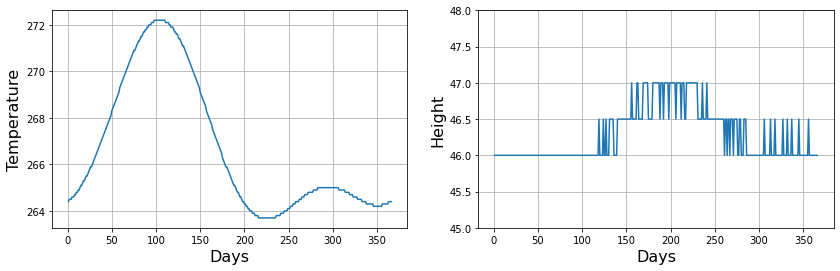

In [214]:
fig,ax = plt.subplots(1, 2, figsize=(14, 4))

# ax[0].plot(final_df['Day'].values, final_df['Tropopause_temp'].values, label='Tropopause')
ax[0].plot(final_df['Day'].values, final_df['Stratopause_temp'].values, label='Stratopause')
# ax[0].plot(final_df['Day'].values, final_df['Mesopause_temp'].values, label='Mesopause')
ax[0].set_xlabel('Days', fontsize = 16)
ax[0].set_ylabel('Temperature', fontsize = 16)
ax[0].grid()

# ax[1].plot(final_df['Day'].values, final_df['Tropopause_height'].values, label='Tropopause')
ax[1].plot(final_df['Day'].values, final_df['Stratopause_height'].values, label='Stratopause')
# ax[1].plot(final_df['Day'].values, final_df['Mesopause_height'].values, label='Mesopause')
ax[1].set_ylim(45, 48)
ax[1].set_xlabel('Days', fontsize = 16)
ax[1].set_ylabel('Height', fontsize = 16)
ax[1].grid()



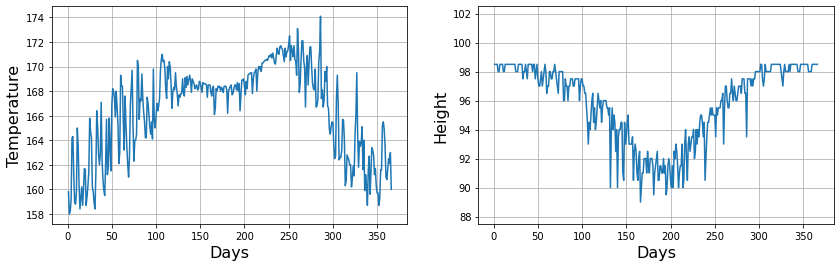

In [215]:
fig,ax = plt.subplots(1, 2, figsize=(14, 4))

# ax[0].plot(final_df['Day'].values, final_df['Tropopause_temp'].values, label='Tropopause')
# ax[0].plot(final_df['Day'].values, final_df['Stratopause_temp'].values, label='Stratopause')
ax[0].plot(final_df['Day'].values, final_df['Mesopause_temp'].values, label='Mesopause')
ax[0].set_xlabel('Days', fontsize = 16)
ax[0].set_ylabel('Temperature', fontsize = 16)
ax[0].grid()

# ax[1].plot(final_df['Day'].values, final_df['Tropopause_height'].values, label='Tropopause')
# ax[1].plot(final_df['Day'].values, final_df['Stratopause_height'].values, label='Stratopause')
ax[1].plot(final_df['Day'].values, final_df['Mesopause_height'].values, label='Mesopause')
ax[1].set_ylim(87.5, 102.5)
ax[1].set_xlabel('Days', fontsize = 16)
ax[1].set_ylabel('Height', fontsize = 16)
ax[1].grid()
